# Prevendo notas do ENEM

## Conteúdo

[1. Introdução](#topic1)

[2. Bibliotecas](#topic2)

[3. Conhecendo os dados](#topic3)

[4. Tratando os dados](#topic4)

[5. Análise exploratória](#topic5)

[6. Feature engineering](#topic6)

[7. Baseline model](#topic7)

[8. Testando diferentes modelos](#topic8)

[9. Grid search e cross validation](#topic9)

[10. Conclusão](#topic10)

<a name="topic1"></a>
## 1. Introdução

Utilizar os dados de desempenho de alunos no Exame Nacional do Ensino Médio (ENEM) pode ser de grande valia, para diferentes setores da sociedades. Nos dias de hoje temos amplo acesso aos dados de desempenho  dos alunos no ENEM. Os dados de desempenho de todos os candidatos podem ser acessados através da página de [microdados do INEP](http://inep.gov.br/microdados), website que contém, além das informações sobre o desempenho no ENEM, os dados anuais do censo da educação.

Com esta grande quantidade de dados e informações nas mãos, assim como a capacidade computacional para processamento destes dados, a ciência de dados pode se tornar uma aliada do setor educacional. Com a ciência de dados podem ser obtidos `insights` e previsões que podem auxiliar os gestores na tomada de decisão. As possibilidades são variadas, que vão desde a visualização do desempenho de alunos através de dashboards interativos, até a previsão do desempenho de alunos de acordo com suas características socioeconômicas. 

Portanto, trazemos alguns insights e possibilidades da utilização destes dados. Neste trabalho temos como **objetivo principal o desenvolvimento de um modelo para a predição da nota de matemática de candidatos do ENEM, com base em características dos candidatos fornecidas nos microdados do INEP**.

Para atingir o objetivo principal, alguns objetivos específicos igualmente importantes foram atingidos:

* Limpeza dos dados;
* Análise exploratória descritiva;
* Engenharia de features.

Este modelo, em conjunto com análises exploratórias estatísticas e conhecimento do setor de educação, pderiam auxiliar gestores a tomar ações direcionadas para grupos específicos de alunos. Por exemplo, temos dados de um determinado grupo de alunos em mãos e utilizamos o modelo preditivo para estimar a nota aproximada que alunos com aquelas características teriam no ENEM. Ao verificar grupos com maior potencial de obter uma nota baixa, os gestores poderiam tomar essas ações, como um acompanhamento pedagógico mais próximo, aulas de reforçõ específicas, criação de grupos de estudos, etc.

Ao fim deste trabalho, pretende-se criar uma aplicação web para que outras pessoas possam facilmente obter previsões de notas no ENEM.

<a name="topic2"></a>
## 2. Bibliotecas

In [95]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)
import matplotlib.pyplot as plt

<a name="topic1"></a>
## 3. Conhecendo os dados

Nesta seção conhecemos os dados pela primeira vez. São apresentadas a origem do conjunto de dados, quantidade de linhas em colunas nos conjuntos de treino e teste além de algumas análise estatísticas primárias utilizando a bibliotecas Pandas.

Os dados deste problema são referentes as notas de enem do ano de 2016 de uma determinada amostra de candidatos. Os dados contém colunas com informações sociais, econômicas, geográficas, entre outras informações. Para maiores detalhes de todas as colunas presentes nos dados, por favor consultar o [dicionário de microdados do ENEM](https://s3-us-west-1.amazonaws.com/acceleration-assets-highway/data-science/dicionario-de-dados.zip).

Nossa coluna alvo é a nota na prova de matemática: `NU_NOTA_MT`.

In [96]:
enem_treino = pd.read_csv('train.csv')
enem_teste = pd.read_csv('test.csv')
print('O dataset de treino tem {} linhas e {} colunas.'.format(enem_treino.shape[0], enem_treino.shape[1]))
print('O dataset de teste tem {} linhas e {} colunas.'.format(enem_teste.shape[0], enem_teste.shape[1]))

O dataset de treino tem 13730 linhas e 167 colunas.
O dataset de teste tem 4576 linhas e 47 colunas.


In [97]:
enem_treino.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEA

In [98]:
enem_teste.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,NaN,A


In [99]:
enem_teste.describe()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,1480.000000,4576.000000,1480.000000,4576.000000,4576.0,4576.000000,4576.0,4576.0,4576.000000,4576.000000,4576.0,4576.000000,4576.000000,4576.000000,3442.000000,3442.000000,3377.000000,4576.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000
mean,30.762019,21.542395,2.181163,1.060970,1.791084,2.119537,1.368663,1.182432,0.127404,2.264865,0.000874,0.0,0.000219,0.0,0.0,0.010271,0.000437,0.0,0.752185,0.752185,0.739729,473.136287,529.195264,514.304205,0.604458,1.095943,119.626888,111.915902,106.384365,112.881256,76.683447,527.491857
std,9.912313,6.854073,1.017531,0.281289,0.875692,3.210353,0.568589,0.572495,0.333461,0.716922,0.029556,0.0,0.014783,0.0,0.0,0.100835,0.020904,0.0,0.431791,0.431791,0.440818,70.995131,73.086665,67.725564,0.489020,0.695047,29.028146,33.296849,33.834492,33.202244,42.985637,151.979490
min,11.000000,14.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,17.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,419.625000,479.725000,468.400000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000
50%,31.000000,19.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,458.250000,532.000000,516.800000,1.000000,1.000000,120.000000,120.000000,100.000000,120.000000,80.000000,540.000000
75%,35.000000,23.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,514.350000,579.550000,562.400000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000
max,53.000000,65.000000,5.000000,4.000000,4.000000,10.000000,3.000000,3.000000,1.000000,4.000000,1.000000,0.0,1.000000,0.0,0.0,1.000000,1.000000,0.0,1.000000,1.000000,2.000000,778.900000,773.600000,708.900000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,980.000000


In [100]:
enem_teste.dtypes

NU_INSCRICAO               object
CO_UF_RESIDENCIA            int64
SG_UF_RESIDENCIA           object
NU_IDADE                    int64
TP_SEXO                    object
TP_COR_RACA                 int64
TP_NACIONALIDADE            int64
TP_ST_CONCLUSAO             int64
TP_ANO_CONCLUIU             int64
TP_ESCOLA                   int64
TP_ENSINO                 float64
IN_TREINEIRO                int64
TP_DEPENDENCIA_ADM_ESC    float64
IN_BAIXA_VISAO              int64
IN_CEGUEIRA                 int64
IN_SURDEZ                   int64
IN_DISLEXIA                 int64
IN_DISCALCULIA              int64
IN_SABATISTA                int64
IN_GESTANTE                 int64
IN_IDOSO                    int64
TP_PRESENCA_CN              int64
TP_PRESENCA_CH              int64
TP_PRESENCA_LC              int64
CO_PROVA_CN                object
CO_PROVA_CH                object
CO_PROVA_LC                object
CO_PROVA_MT                object
NU_NOTA_CN                float64
NU_NOTA_CH    

## 4. Tratando os dados

Os dados podem conter informações equivocadas devido a diversos problemas que podem ocorrer durante o percurso ocorrido no em seu processamento. Além disso, podém existir variáveis no conjunto de dados que claramente não são de nosso interesse, podendo ser eliminadas já nesta etapa de pré-processamento.

Nesta etapa são realizadas algumas verificações e correções nos seguintes aspectos:

* Organização inicial dos dados
* Tratamento dos dados nulos;
* Verificação de outliers;
* Verificação de conformidade dos valores.

### Organização inicial dos dados

Antes de começar a limpeza, devemos primeiramente observar que as colunas dos dois datasets não são iguais, pois temos uma quantidade maior de colunas no dataset de treino. Podemos eliminar as colunas do dataset de treino que não existem nos datasets de teste. Assim, nosso problema já fica limitado as 47 variáveis presentes no dataset de teste.

In [101]:
cols = enem_teste.columns.tolist()
cols.append('NU_NOTA_MT')
enem_treino = enem_treino.loc[:, cols]
enem_treino.shape

(13730, 48)

Para não ter que realizar o mesmo tratamento  nos conjuntos de treino e teste, vamos unir os dois dataframes. Para não perder as instâncias referentes a cada conjunto, criamos uma nova coluna indicando quais são os dados de treino ou de teste.

In [102]:
enem_treino.loc[:, 'treino'] = 1
enem_teste.loc[:, 'treino'] = 0
enem = pd.concat([enem_treino, enem_teste])
treino_shape = enem[enem.treino==1].shape[0]
teste_shape = enem[enem.treino==0].shape[0]
print('Conferindo: temos {} linhas de treino e {} linhas de teste.'.format(treino_shape, teste_shape))

Conferindo: temos 13730 linhas de treino e 4576 linhas de teste.


/home/alexandremarcondes/codenation/data-science-4/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


### Tratamento dos dados nulos

Deve ser verificada a presença de dados nulos no dataset, assim como sua substituiçao ou eliminação.

In [103]:
nulos_colunas = list(enem.isnull().sum()[enem.isnull().sum() > 0].index)
nulos_qtd = list(enem.isnull().sum()[enem.isnull().sum() > 0].values)
nulos_pct = list((enem.isnull().sum()[enem.isnull().sum() > 0].values / enem.shape[0])*100)
nulos = pd.DataFrame({'feature':nulos_colunas, 'nulos_qtd':nulos_qtd, 'nulos_pct':nulos_pct})
nulos

,feature,nulos_qtd,nulos_pct
0,NU_NOTA_CH,4523,24.707746
1,NU_NOTA_CN,4523,24.707746
2,NU_NOTA_COMP1,4796,26.199060
3,NU_NOTA_COMP2,4796,26.199060
4,NU_NOTA_COMP3,4796,26.199060
5,NU_NOTA_COMP4,4796,26.199060
6,NU_NOTA_COMP5,4796,26.199060
7,NU_NOTA_LC,4796,26.199060
8,NU_NOTA_MT,8173,44.646564
9,NU_NOTA_REDACAO,4796,26.199060


Vamos analisar cada uma destas colunas e tomar decisões sobre o ações em relação aos dados nulos.

**TP_ENSINO, TP_DEPENDENCIA_ADM_ESC, Q027**

Devido a grande quantidade de dados nulos, e também por se tratarem de variáveis categóricas onde o nulo não tem sentido na variável, estas colunas serão somente excluídas.

**Demais colunas**

Todas as demais colunas que possuem valores nulos se referem a notas de participantes em algum componente. Verificamos um padrão nestas colunas: é atribuido nulo para notas onde o candidato esteve ausente no dia da realização da prova. Então, será feito o seguinte: os valores nulos serão preenchidos com zero.

Deve-se notar porém a presença de uma coluna categórica entre as colunas de notas: `TP_STATUS_REDACAO`, a qual representa o status da redação do candidato. Nesta coluna o zero será atribuido para a categoria `ausente`. Já nas outras colunas o valor zero será de fato um valor numérico, considerando uma nota zero para o candidato naquele componente.

In [104]:
to_drop = ['TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'Q027']
to_fill = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 
           'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 
           'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 
           'NU_NOTA_REDACAO', 'NU_NOTA_MT']
enem = enem.drop(to_drop, axis=1)
enem.loc[:, to_fill] = enem[to_fill].fillna(0)

### Verificação de outliers



In [105]:
enem.describe()

,CO_UF_RESIDENCIA,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_DISCALCULIA,IN_DISLEXIA,IN_GESTANTE,IN_IDOSO,IN_SABATISTA,IN_SURDEZ,IN_TREINEIRO,NU_IDADE,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_ANO_CONCLUIU,TP_COR_RACA,TP_ESCOLA,TP_LINGUA,TP_NACIONALIDADE,TP_PRESENCA_CH,TP_PRESENCA_CN,TP_PRESENCA_LC,TP_STATUS_REDACAO,TP_ST_CONCLUSAO,treino
count,18306.000000,18306.000000,18306.0,18306.000000,18306.000000,18306.000000,18306.000000,18306.000000,18306.000000,18306.000000,18306.000000,18306.000000,18306.000000,18306.000000,18306.000000,18306.000000,18306.000000,18306.000000,18306.000000,18306.000000,18306.000000,18306.000000,18306.00000,18306.000000,18306.000000,18306.000000,18306.000000,18306.000000,18306.000000,18306.000000,18306.00000,18306.000000
mean,30.743035,0.001147,0.0,0.000055,0.000055,0.000819,0.000109,0.009833,0.000328,0.129247,21.580957,398.706184,356.437698,88.388069,82.594996,78.756146,83.441768,56.974489,380.761750,267.079182,390.155468,2.139517,2.18453,1.357315,0.596362,1.051896,0.753906,0.753906,0.738993,0.812029,1.78477,0.750027
std,9.874640,0.033851,0.0,0.007391,0.007391,0.028614,0.010452,0.098675,0.018102,0.335483,6.996595,237.157270,213.299251,58.497973,57.064758,55.370781,57.407016,50.198626,234.367417,251.103356,267.354736,3.215519,1.00983,0.561041,0.490640,0.264714,0.431886,0.431886,0.440314,0.771034,0.87946,0.433009
min,11.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000
25%,23.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,345.900000,365.525000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.00000,1.000000
50%,31.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,499.550000,433.000000,120.000000,100.000000,100.000000,100.000000,60.000000,485.300000,375.100000,480.000000,0.000000,3.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.00000,1.000000
75%,35.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,563.900000,493.275000,120.000000,120.000000,120.000000,120.000000,100.000000,547.300000,472.800000,580.000000,3.000000,3.00000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.00000,1.000000
max,53.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,67.000000,807.000000,806.400000,200.000000,200.000000,200.000000,200.000000,200.000000,763.600000,952.000000,1000.000000,10.000000,5.00000,4.000000,1.000000,4.000000,2.000000,2.000000,2.000000,9.000000,4.00000,1.000000


Observando as estatísticas principais dos valores, não observamos nenhum valor fora do comum que chama a atenção. Podemos notar principalmente nos valores máximos e mínimos das colunas de notas: nenhum valor acima de 1000 (maior nota possível) ou abaixo de zero (menor nota possível).

Podemos Observar os boxplots dos dados de nota para a visualização dos extremos dos intervalos.

In [106]:
lista_notas = []
for coluna in enem.columns:
    if 'NOTA' in coluna:
        lista_notas.append(coluna)

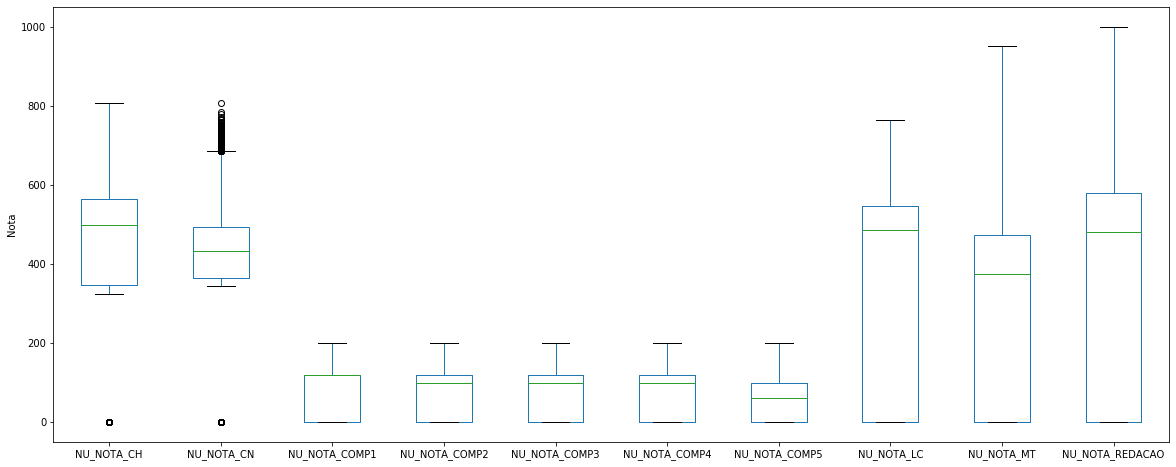

In [107]:
fig, ax = plt.subplots(figsize=(20,8))
enem[lista_notas].plot(kind='box', ax=ax)
ax.set_ylabel('Nota')
plt.show()

Podemos fazer algumas observações sobre os boxplots observados acima:

* As notas que contém "COMP" no nome se referem a componentes específicos de alguma disciplina e a nota máxima seria 200. Portanto, não há nada de anormal nos box destes componentes.
* Nos demais componentes, observam-se outliers em zero. Porém, estas são de fato candidatos que atingiram essa nota nesta disciplina, em sua grande maioria por ausência na data da prova.
* Observam-se também outliers na parte superior do do boxplot,porém estes valores são referentes a candidatos que obtiveram notas bastante altas em relação aos demais, sendo valores normais apesar de altos em relação a distribuição.

Portanto, após a observação dos boxplots das variáveis das notas, mantém-se a decisão de não excluir nenhum dos outliers observados.

In [108]:
enem.head(1)

,CO_PROVA_CH,CO_PROVA_CN,CO_PROVA_LC,CO_PROVA_MT,CO_UF_RESIDENCIA,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_DISCALCULIA,IN_DISLEXIA,IN_GESTANTE,IN_IDOSO,IN_SABATISTA,IN_SURDEZ,IN_TREINEIRO,NU_IDADE,NU_INSCRICAO,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047,SG_UF_RESIDENCIA,TP_ANO_CONCLUIU,TP_COR_RACA,TP_ESCOLA,TP_LINGUA,TP_NACIONALIDADE,TP_PRESENCA_CH,TP_PRESENCA_CN,TP_PRESENCA_LC,TP_SEXO,TP_STATUS_REDACAO,TP_ST_CONCLUSAO,treino
0,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,43,0,0,0,0,0,0,0,0,0,24,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,495.4,436.3,120.0,120.0,120.0,80.0,80.0,581.2,399.4,520.0,D,D,C,A,A,C,A,RS,4,1,1,1,1,1,1,1,M,1.0,1,1


In [109]:
enem_train = enem[enem.treino==1]
enem_test = enem[enem.treino==0]

In [110]:
y_train = enem_train.loc[:, 'NU_NOTA_MT']
X_train = enem_train.drop(['NU_NOTA_MT', 'NU_INSCRICAO', 'CO_PROVA_CH', 'CO_PROVA_CN', 'CO_PROVA_LC', 'CO_PROVA_MT', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q047', 'TP_SEXO', 'SG_UF_RESIDENCIA'], axis=1)
y_test = enem_test.loc[:, 'NU_NOTA_MT']
X_test = enem_test.drop(['NU_NOTA_MT', 'NU_INSCRICAO', 'CO_PROVA_CH', 'CO_PROVA_CN', 'CO_PROVA_LC', 'CO_PROVA_MT', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q047', 'TP_SEXO', 'SG_UF_RESIDENCIA'], axis=1)

In [111]:
y_train.isnull().sum()

0

In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [120]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)

In [121]:
y_pred

array([421.779, 468.833,   0.   , ..., 441.02 , 419.709, 464.329])

In [122]:
r2_score(y_train, y_pred)

0.9887440013487379

In [123]:
y_pred = reg.predict(X_test)

In [124]:
y_pred

array([444.734, 450.278, 614.902, ..., 685.101, 468.23 ,   0.   ])

In [126]:
answer = pd.DataFrame({'NU_INSCRICAO':list(enem_test.NU_INSCRICAO), 
                      'NU_NOTA_MT':list(y_pred)})

In [127]:
answer

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,444.734
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,450.278
2,b38a03232f43b11c9d0788abaf060f7366053b6d,614.902
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.000
4,715494628a50142ce8cb17191cfe6d0f3cae0934,531.733
5,e656d6bad65c93fb2880f1eba5037008c8e75774,470.692
6,465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13,532.044
7,11539e86171bf07d3a36f09377d7f54ebcc8406a,446.261
8,043c544a2104aa8a9849f1a703a08d37a2f16839,486.194
9,76ba050e64ad100b856f0eaabd8f539d5c7dd185,438.824


In [128]:
answer.to_csv('answer.csv')